***

<div style="text-align: center; color: purple;">
  <h1>Applied Statistics (Tasks)</h1>
</div>

***

Import libraries. 

- [Math](https://docs.python.org/3/library/math.html)
- [Itertools](https://docs.python.org/3/library/itertools.html)
- [Random](https://docs.python.org/3/library/random.html)
- [Numpy](https://numpy.org/doc/stable/reference/index.html#reference)
- [Matplotlib](https://matplotlib.org/stable/contents.html)
- [Statistical functions (scipy.stats)](https://docs.scipy.org/doc/scipy/reference/stats.html)
- [Seaborn: statistical data visualization](https://seaborn.pydata.org/#seaborn-statistical-data-visualization)

In [1]:
import math
import itertools
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import f_oneway

***

### **Task 1: Permutations and Combinations**

#### **Introduction**

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/English_teaware.jpg/320px-English_teaware.jpg)

This task is based on the famous ["Lady Tasting Tea"](https://en.wikipedia.org/wiki/Lady_tasting_tea) experiment, proposed by British statistician [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher).  In the original experiment, there were 8 cups in total—4 with milk poured first and 4 with tea poured first. A woman claimed she could distinguish which cups had milk added first by tasting the tea, and Fisher designed a statistical test to evaluate her ability to do so based on her selections.

In this modified version of the experiment, there are 12 cups—6 with milk poured first and 6 with tea poured first. The goal is to calculate the probability that a person with no special skills can correctly guess the cups based on pure chance.

#### **"Probability Challenge"**

1. We have 12 cups: 6 with milk first and 6 with tea first. Someone claims they can guess which 6 cups had milk first. What is the probability that they guess all 6 cups correctly, assuming they are just guessing?

2. Now, suppose we allow one mistake (they can guess at least 5 cups correctly). What is the probability that they make at most one mistake?

3. Would we accept two mistakes? Why or why not?

***

#### **Define the Hypotheses (Null and Alternative)**

Basic definitions wrom [WikipediA](https://en.wikipedia.org/wiki/Null_hypothesis):

> The null hypothesis and the alternative hypothesis are types of conjectures used in statistical tests to make statistical inferences, which are formal 
> methods of reaching conclusions and separating scientific claims from statistical noise.

##### **The Null Hypothesis**

The person (whoewer it is) does not have any special skills of guessing the correct cup of tea with the milk in first or with the tea in first. The guessing is baised on the pure chance. 


##### **The Alternative Hypothesis**

The person does have the ability of correctly guessing the right order of pouring milk or tea in first, and can do better than just guessing randomly.

***

Specifying and setting the main variables.

In [2]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk in first.
no_cups_milk_first = 6

# Number of cups of tea with tea in first.
no_cups_tea_first = 6

Using the `math` library, specifically the [`math.comb()`](https://docs.python.org/3/library/math.html#math.comb)function. This function computes the number of ways to choose a specific number of items (cups in this case) from a larger set without considering the order of selection.

The combination formula is defined as **n! / (k! * (n - k)!)** when **k** is less than or equal to **n**. If **k** is greater than **n**, the value is zero (**n** is the total number of items in a set, **𝑘** is the number of items to be selected from that set).


In [3]:
# Number of ways of selecting six cups from twelve.
ways = math.comb(no_cups, no_cups_milk_first)

# Show.
ways


924

Сreating a list of labels that can be used to represent each cup of tea in the experiment. This is useful for refering to individual cups by an index or label and performing calculations.

In [4]:
# The cup labels.
labels = list(range(no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Generating all possible combinations of the labels (which represent the cups), where the number of cups chosen is equal to no_cups_milk_first, using  [**`itertools.combinations()`**](https://docs.python.org/3/library/itertools.html#itertools.combinations).

In [5]:
# Show the different ways of selecting no_cups_milk_first out of no_cups cups of tea.
combs = list(itertools.combinations(labels, no_cups_milk_first))

# Show.
# combs

# Number of combinations.
len(combs)

924

Using [**`random.sample()`**](https://docs.python.org/3/library/random.html#random.sample) that randomly picks 6 unique labels from the list without replacement, which means that no label can be chosen more than once.

In [6]:
# Select six cups at random to put milk in first.
labels_milk = random.sample(labels, 6)

# Sort, inplace.
labels_milk.sort()

# Show.
labels_milk

[0, 2, 7, 9, 10, 11]

Сalculating how much the guessed combinations (combs) overlap with the actual set of cups that had milk poured first (labels_milk).

In [7]:
# Calculate the overlap between each element of combs and labels_milk.

no_overlaps = []

for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap)) 


Using [**`np.unique()`**](https://numpy.org/doc/2.0/reference/generated/numpy.unique.html#numpy-unique) to return the unique values found in the input array (the no_overlaps list) and their corresponding frequencies.

In [8]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4, 5, 6]),
 array([  1,  36, 225, 400, 225,  36,   1], dtype=int64))

Generating a bar chart to visually represent the frequency of overlaps.

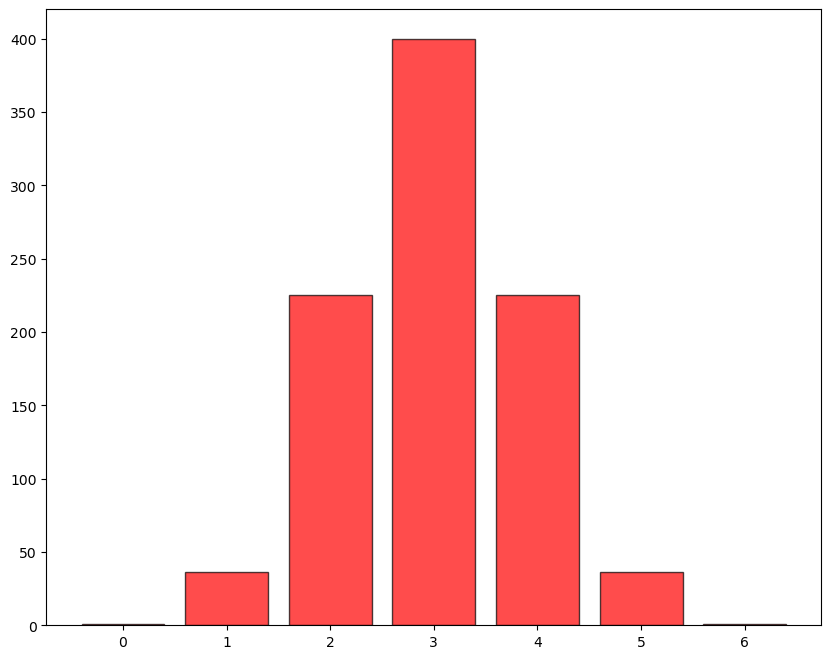

In [9]:
# Create a figure.
fig, ax = plt.subplots(figsize=(10, 8))

# Bar chart.
ax.bar(counts[0], counts[1], color='red', edgecolor='black', alpha = 0.7);


***

#### **Evidence**

There are 12 cups in total, and the person has to guess which 6 had milk poured first. If they are guessing randomly, there is only 1 correct combination out of 924 possible ways to pick 6 cups from 12.
The chance of guessing all 6 correctly is about 0.1%. This means that it's very unlikely for someone to guess all the cups correctly. 


In [10]:
# The probability that it will be (randomly) selected the six correct cups.
1 / ways

0.0010822510822510823

If we allow them to make 1 mistake and to guess at least 5 cups correctly, there are 36 ways to get 5 cups right (and 1 wrong) and still 1 way to get all 6 right. So, the chance of guessing at least five cups correctly is 4.0%. This is still a small probability, but it's more reasonable compared to guessing all 6 perfectly.

In [11]:
# The probability that it will be (randomly) selected at least five correct cups.
(36 + 1) / ways

0.04004329004329004

If we allow them to make 2 mistakes and to guess at least 4 cups correctly, there are 225 ways to get 4 cups right (and 2 wrong), 36 ways to get 5 cups right (and 1 wrong) and 1 way to get all 6 cups right. The probability jumps to 28.35%, which is significantly higher, making it much easier to achieve success even by random guessing. 

In [12]:
# The probability that it will be (randomly) selected at least four correct cups.
(225 + 36 + 1) / ways

0.28354978354978355

Again, if we allow two mistakes in the test, the probability of guessing correctly rises significantly. This increased probability weakens the validity of the null hypothesis, which claims that the person does not possess any special skill. Allowing two mistakes introduces enough chance into the process that it becomes unclear whether the person is truly guessing or has some ability, making the test less reliable for proving any special skill.

***
***

### **Task 2: numpy's Normal Distribution**

#### **Introduction**

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Normal_distribution_pdf.png/320px-Normal_distribution_pdf.png)

The definition of Normal Distribution wrom [WikipediA](https://en.wikipedia.org/wiki/Normal_distribution):

In probability theory and statistics, a **normal distribution** or **Gaussian distribution** is a type of continuous probability distribution for a real-valued random variable. The general form of its [**probability density function**](https://en.wikipedia.org/wiki/Probability_density_function) is 

$ f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $


The parameter $ \mu $ is the **mean** or expectation of the distribution (and also its median and mode), while the parameter $ \sigma ^{2} $ is the **variance**. The standard deviation of the distribution is $ \sigma $ (sigma). A random variable with a Gaussian distribution is said to be normally distributed, and is called a **normal deviate**.

#### **"Evaluating the Normality of Data"**

1. Create a sample of 100,000 values using numpy.random.normal() with a mean of 10.0 and a standard deviation of 3.0.
2. Use scipy.stats.shapiro() to test if this sample follows a normal distribution. Analyze and explain the results, including any output from the test.
3. Plot a histogram of the generated sample. Overlay the histogram with the corresponding normal distribution's probability density function.

***

Generate a large sample from a normal distribution and provide basic statistical insights by printing its size, range (minimum and maximum values), and a preview of the initial values in the sample.

In [13]:
# Generate a random normal sample.
data = np.random.normal(10.0, 3.0, 100000)

print(len(data))
print(min(data))
print(max(data))
# Show.
print(data[:100])

100000
-4.529448441377339
23.924800094589997
[13.4884739  10.45297472  7.59627732 10.00973865 14.13368735  7.89183551
  6.20540013  8.31905803  9.91105499 10.08003621 11.25886232 13.41372451
 10.6187194  12.11081885  8.73733918  9.7329152  13.1055817   8.82272948
 14.54725066 11.75068448  9.45707682 12.56277367  6.28136241  9.39118948
  8.1246148  13.87919343 10.98123389 14.80479386 10.83158747 13.88844747
 13.59216875  5.89568484 11.26575491  6.31988829  8.44529521  9.10495705
 10.50469739  5.85928314  8.73608861 10.02509596  8.3639823  13.70662556
  9.25552961 11.6206915   9.67969872  9.879617   10.85021921  9.6383121
 10.98200018 11.25657938  6.52439093  5.55283562 11.59350324  9.98206139
  6.72494109  6.70517424  8.62437862 14.46416541  8.21798471  7.71886891
 13.80010311 11.01968552  9.69322721 13.19703349 11.5581868  10.14332365
  7.41434293  7.73189243 15.4487719  -0.16850104  7.14065156  6.73500067
 11.23056449 11.72017982  4.34179243  4.76785259 11.32441749  9.32958634
 12.168

*** 

##### **Shapiro-Wilk Test**

The definition of what **Shapiro–Wilk test** is from  [WikipediA](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test).

Perform the [Shapiro Wilk test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) from `scipy.stats` (module in the SciPy library that provides a comprehensive set of tools for statistical analysis and probability distributions).


In [14]:
# Perform the Shapiro Wilk test.
stats.shapiro(data)

c:\Users\uliya\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9999791383743286, pvalue=0.8969900608062744)

**Interpreting the results**

We received a warning indicating that the Shapiro-Wilk test’s accuracy decreases with large sample sizes, particularly when the sample size exceeds 5,000 observations. In these cases, the p-value produced by the test may be unreliable.

Despite this warning, the Shapiro-Wilk test statistic is close to 1, suggesting that the data is likely normally distributed. Additionally, the high p-value indicates no statistically significant deviation from normality. In other words, we fail to reject the null hypothesis that the sample comes from a normal distribution at common significance levels (e.g., 0.05).

***

Plot a histogram to show the shape of the data distribution and determine if it resembles the expected normal distribution (bell curve). Overlay the Probability Density Function (PDF) of a normal distribution with the same mean (10.0) and standard deviation (3.0) as the sample data.

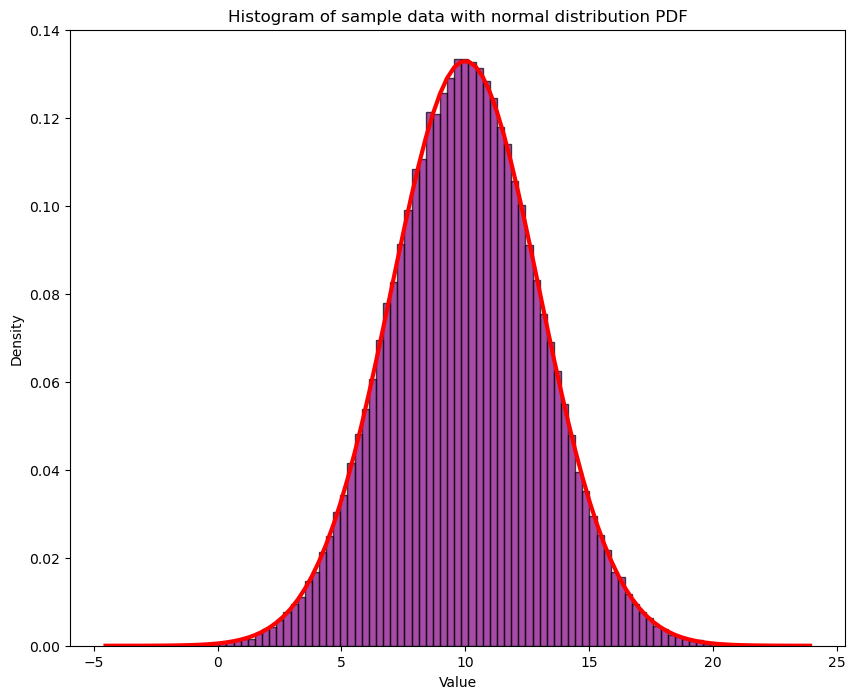

In [15]:
# Create a blank plot.
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the histogram.
ax.hist(data,  bins=np.linspace(min(data), max(data), 100), density=True, color='purple', edgecolor='black',  alpha = 0.7)

# Calculate and plot the PDF for the normal distribution with the same mean and std deviation
x_values = np.linspace(min(data), max(data), 100)
pdf_values = stats.norm.pdf(x_values, 10.0, 3.0)
ax.plot(x_values, pdf_values, 'r', linewidth=3)

ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.set_title('Histogram of sample data with normal distribution PDF');



This visualization effectively shows how closely the sample data matches the expected normal distribution, allowing for an easy visual check of normality.

***
***

### **Task 3: t-Test Calculation**

#### **Introduction**

![](https://upload.wikimedia.org/wikipedia/commons/b/b8/Common_Test_Statistics_Chart.png)

***Common Test Statistics Chart***

The definition of **t-test** (**Student's t-test**) from [WikipediA](https://en.wikipedia.org/wiki/Student%27s_t-test): 

> Student's t-test is a statistical test used to test whether the difference between the response of two groups is statistically significant or not. It is any statistical hypothesis test in which the test statistic follows a Student's t-distribution under the null hypothesis. 

There are different types of t-tests depending on the nature of the data and the relationship between the groups being compared.

1. **One-Sample t-Test**. Compares the mean of a single sample to a known value (usually the population mean).

2. **Independent Two-Sample t-Test**. Compares the means of two independent groups.

3. **Paired Sample t-Test (Dependent t-Test)**. Compares the means of two related groups (e.g., measurements before and after a treatment or intervention).


***

#### **"Calculating the T-Statistic for Paired Sample Data"**

In this task we need to analyze data on patients' resting heart rates measured before and after a two-week exercise program. Our goal is to determine whether the program significantly affected heart rates by calculating the t-statistic for paired data.

**Data**:

| Patient ID | 0  | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  |
|------------|----|----|----|----|----|----|----|----|----|----|
| **Before** | 63 | 68 | 70 | 64 | 74 | 67 | 70 | 57 | 66 | 65 |
| **After**  | 64 | 64 | 68 | 64 | 73 | 70 | 72 | 54 | 61 | 63 |

**Steps**:

1. Define Hypotheses: Null Hypothesis and Alternative Hypothesis.
2. Evaluate the data based on the assumptions of the Paired t-Test.
3. Calculate the t-statistic manually and using scipy.stats.ttest_rel().
4. Compare the results and conclude whether the change in heart rate is statistically significant.

***

**Defining hypotheses**: 

**Null Hypothesis**: The mean resting heart rate of patients before and after the two-week exercise program is equal.

**Alternative Hypothesis**: The mean resting heart rate of patients before and after the two-week exercise program is not equal.

***

**Evaluating the data based on the assumptions of the Paired t-Test.**

Before proceeding to solve the task, it is necessary to analyze the given sample to verify its compliance with the ***assumptions*** (resources: [Dependent T-Test using SPSS Statistics](https://statistics.laerd.com/spss-tutorials/dependent-t-test-using-spss-statistics.php), [Assumptions_Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-test#Assumptions)).

**Assumptions of the Paired t-Test**

To ensure the validity of a paired t-test, the following assumptions must be satisfied:

1. Dependent Variable on a Continuous Scale: The variable being measured should be continuous (e.g., interval or ratio scale). Examples include exam scores, weights, or heart rates.

2. Related Groups (Paired Observations): The two datasets must come from the same individuals or entities measured twice (e.g., "before" and "after" conditions).

3. No Significant Outliers: There should be no extreme data points in the differences between the two paired groups, as they can distort the results.

4. Normal Distribution of Differences: The differences between paired measurements should follow an approximately normal distribution. This assumption is somewhat robust, but significant deviations can affect the reliability of the test. Tests like the Shapiro-Wilk test can verify normality.

In [16]:
# Define the data.
before = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
after = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])

**Assumption Check**

1. The dependent variable (heart rate) is measured on a continuous scale (in beats per minute). The assumption is satisfied.
2. Each "Before" value directly corresponds to an "After" value for the same patient, making it paired data. The assumption is satisfied.
3. Differences between "Before" and "After" heart rates:

In [17]:
# Calculate the differences.
differences = before - after
print(differences)

[-1  4  2  0  1 -3 -2  3  5  2]


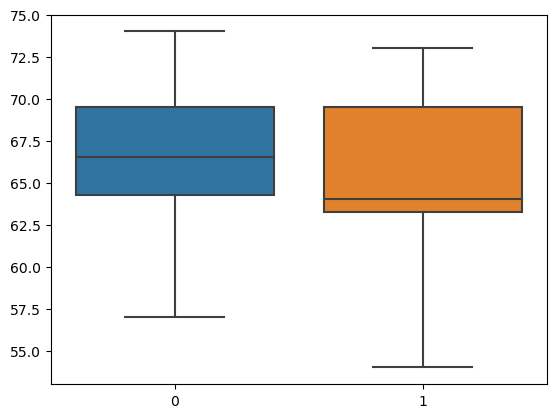

In [18]:
# Box plot.
sns.boxplot(data=[before,after]);

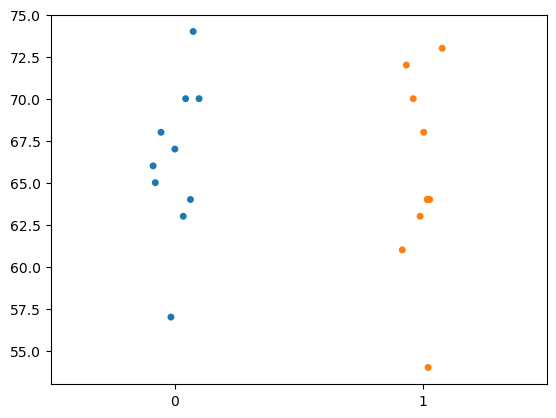

In [19]:
# Create a strip plot.
sns.stripplot(data=[before,after]);

Conclusion: No significant outliers detected.

4. Using the differences calculated, we can check for normality using the Shapiro-Wilk test.

In [20]:
# Perform the Shapiro Wilk test.
stats.shapiro(differences)

ShapiroResult(statistic=0.9752339720726013, pvalue=0.9346861243247986)

Test Statistic сlose to 1, suggesting the data aligns reasonably well with normal distribution. Since p>0.05, we fail to reject the null hypothesis, meaning there is no significant evidence that the differences deviate from normality.

***

**Calculating the t-statistic manually and using scipy.stats.ttest_rel().**

From the WikipediA resourse: [Dependent t-test for paired samples](https://en.wikipedia.org/wiki/Student%27s_t-test#Dependent_t-test_for_paired_samples) the formula for the Paired t-Test is as follows:

$ t = \frac{\bar{X}_D - \mu_0}{\frac{s_D}{\sqrt{n}}} $

Where:
- $ \bar{X}_D $: the mean of the differences between paired observations (e.g., results before and after).
- $ s_D $: the standard deviation of the differences.
- $ n $: the number of paired observations.
- $ \mu_0 $: the hypothesized difference (usually \(0\) when testing for no change).



So, let's implement a calculation according to this formula using Python (the differences have already been calculated).

In [21]:
# Calculate mean difference (X̄_D).
X_D_bar = np.mean(differences)

# Calculate standard deviation of differences (s_D).
s_D = np.std(differences, ddof=1)

# Number of pairs (n).
n = len(differences)

# Hypothesized difference (μ_0).
mu_0 = 0

# Calculate t-statistic.
t_statistic = (X_D_bar - mu_0) / (s_D / np.sqrt(n))

# Show.
t_statistic

1.3372274824806283

Now, let's Implement a calculation of the t-statistic using [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#ttest-rel) from the`scipy.stats` library.  

In [22]:
# Paired samples t-test.
stats.ttest_rel(before, after)

TtestResult(statistic=1.337227482480628, pvalue=0.21396011317404623, df=9)

***

**Conclusions**

The manually calculated t-statistic matches the result obtained using `scipy.stats.ttest_rel`, confirming the correctness of both approaches. 

The results of the paired t-test are as follows:

 - t-statistic: 1.3372
 - p-value: 0.2140
 - Degrees of freedom (df): 9.

 The t-statistic of 1.3372 is not unusually large because of the small sample size (10 paired observations, resulting in 9 degrees of freedom). With a small sample, it's harder to achieve a large t-statistic, as the variability in the data (standard deviation) affects the calculation. The result indicates a modest difference between the "before" and "after" heart rates, but the p-value of 0.2140 suggests the difference is not statistically significant.

***
***

### **Task 4: ANOVA**

#### **Introduction**

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/F-test_plot.svg/540px-F-test_plot.svg.png)

***F-test plot***


The definition of **F-test** from [WikipediA](https://en.wikipedia.org/wiki/F-test): 

> An **F-test** is any statistical test used to compare the variances of two samples or the ratio of variances between multiple samples. 

[**Analysis of variance (ANOVA)**](https://en.wikipedia.org/wiki/Analysis_of_variance) is a statistical method used to compare the means of multiple groups to determine if there are statistically significant differences among them.

**Objective**: Test the null hypothesis ($H_0$), which states that all groups have the same mean.

**Core Principle**: ANOVA compares the variation within groups to the variation between groups.
If the variation between groups is significantly larger than the variation within groups, the null hypothesis is rejected.

**Types of ANOVA**:
 - **One-Way ANOVA**: Tests the effect of a single independent variable (factor) on a dependent variable.
 - **Two-Way ANOVA** (or more): Analyzes the effects of two or more factors simultaneously.

**ANOVA Output**:
 - **F-statistic**: The ratio of between-group variance to within-group variance.
 - **p-value**: If $𝑝 < 0.05$, the null hypothesis is rejected, indicating that at least one group's mean is different.

***

#### **"Estimating the Probability of Type II Errors with ANOVA"**

In this task we need to estimate the probability of committing a Type II error under specific conditions using simulation and statistical testing. 

**The steps**:

1. Create a variable no_type_ii and initialize it to 0.

2. Perform the following experiment 10,000 times:

3. Generate three independent samples of size 100 each using [numpy.random.normal](https://numpy.org/devdocs/reference/random/generated/numpy.random.normal.html). Assign:
 - Mean = 4.9 for the first sample,
 - Mean = 5.0 for the second sample,
 - Mean = 5.1 for the third sample.
 - Use a standard deviation of 0.1 for all samples.

4. Conduct a one-way ANOVA test on the three samples and add 1 to no_type_ii whenever a type II error occurs.

5. Summarize and explain the results (the probability of Type II errors under these conditions).

***

**Defining Hypotheses**

**Null Hypothesis**: The mean values of the three samples are equal.  


**Alternative Hypothesis**: At least one of the mean values of the three samples is different.  

***

**Evaluating the data to ensure it meets the assumptions for one-way ANOVA**

In [23]:
# Set the variable and the counter
no_type_ii = 0
num_times = 10000

In [24]:
# Generate the samples
sample1 = np.random.normal(loc=4.9, scale=0.1, size=100)
sample2 = np.random.normal(loc=5.0, scale=0.1, size=100)
sample3 = np.random.normal(loc=5.1, scale=0.1, size=100)

In [25]:
# Show. 
print ( "Sample1:", sample1[:20])
print ( "Sample2:", sample2[:20])
print ( "Sample3:", sample3[:20])

Sample1: [4.86533452 4.90106629 5.00211143 4.94401221 5.12124116 5.08511928
 4.77961631 4.9342653  4.89727356 5.00688505 4.92481797 4.91529388
 4.90015181 4.92327611 4.88492238 4.81723619 4.88337714 4.9947323
 5.04054407 4.8378562 ]
Sample2: [5.09265378 5.01339222 4.91683131 4.91738235 4.90058705 5.04261211
 5.21920314 5.03751727 5.21635709 5.02555949 5.03018599 4.98740779
 5.13397772 5.00402525 4.88548396 5.00282155 4.93646729 4.86305641
 4.91182958 5.01773119]
Sample3: [5.03962283 5.12190227 5.05317707 5.04993127 5.10982667 5.19945939
 5.20210046 4.96207333 5.1374557  5.22307367 5.22093483 5.07943112
 5.09845677 4.98884071 5.13965021 5.15560993 5.15521456 5.14266554
 4.98223915 5.15517207]


Before proceeding to solve the task, it is necessary to analyze the given sample to verify its compliance with the ***assumptions*** (resources: [One-way ANOVA in SPSS Statistics](https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php), [Assumptions_Wikipedia](https://en.wikipedia.org/wiki/Analysis_of_variance#Assumptions)).

The following assumptions must be satisfied:

1. **Dependent Variable is Continuous.** The dependent variable should be measured on an interval or ratio scale (e.g., continuous data). 

For our task, the dependent variable is the sample data (e.g., values generated with means 4.9, 5.0, and 5.1). These are continuous and meet this assumption.

2. **Independent Variable Consists of Categorical Groups.** The independent variable should have two or more categorical, independent groups.

In our case, the groups correspond to the three datasets. These groups are independent, satisfying this assumption.

3. **Independence of Observations.**  Each observation in the dataset should be independent. This means:
   - Participants or data points in one group are not related to those in another group.
   - There is no overlap between the groups.  

Our simulated data has no relationship between observations in different samples, fulfilling this assumption.

4. **No Significant Outliers.** Outliers are individual data points that deviate significantly from the rest of the data. They can distort results, reducing validity. 

In our case, the samples are generated from normal distributions with small standard deviations ($\sigma = 0.1$), so outliers are unlikely. However, detecting and handling outliers is critical for real-world datasets.

5. **Normal Distribution of the Dependent Variable.**  The dependent variable should be approximately normally distributed for each group. While ANOVA is robust to minor deviations from normality, severe violations can affect results (Suggested using tests like [Shapiro-Wilk](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) or [Q-Q plots](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) to check normality).  

Since our data is generated from normal distributions, this assumption is inherently satisfied.

6. **Homogeneity of Variances.**  The variances of the dependent variable should be equal across groups. This can be tested using:
   - [Levene's Test](https://en.wikipedia.org/wiki/Levene%27s_test): Assesses equality of variances.
   - [Welch’s ANOVA](https://en.wikipedia.org/wiki/Welch%27s_t-test): Used if this assumption is violated.  

In our simulation, the groups have the same standard deviation ($\sigma = 0.1$), so this assumption holds true.

Summary, these assumptions confirm that one-way ANOVA is an appropriate method for analyzing the simulated data.


***

Let's plot the distribution of our data to make it clearer.

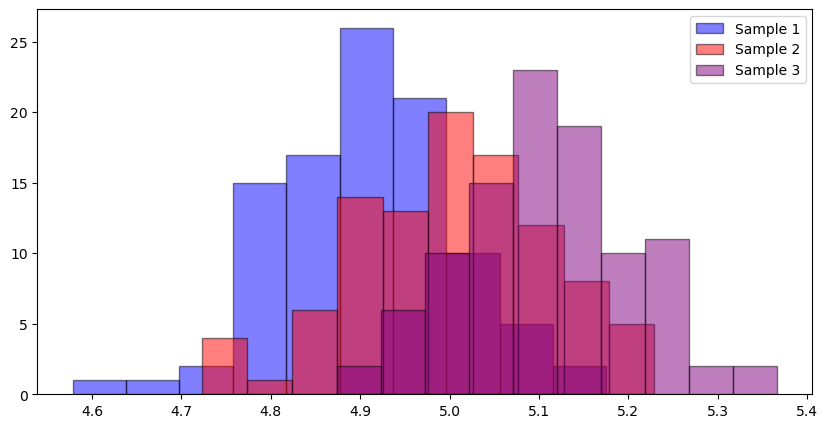

In [26]:
# Create histograms.
fig, ax = plt.subplots(figsize=(10, 5))

# Histogram of the first sample.
ax.hist(sample1, bins=10, alpha=0.5, label='Sample 1', edgecolor='black', color='blue')

# Histogram of the second sample.
ax.hist(sample2, bins=10, alpha=0.5, label='Sample 2', edgecolor='black', color='red')

# Histogram of the third sample.
ax.hist(sample3, bins=10, alpha=0.5, label='Sample 3', edgecolor='black', color='purple')

# Add a legend.
ax.legend();

***

#### **What is a Type II Error?**

Next step is to define the Types of Error.  

According to [Wikipedia's description](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors#Table_of_error_types) of the types of errors: 
 - The **Type II error** occurs when the null hypothesis $H_0$ is **false**, but the test fails to reject it. This means the test misses detecting an effect or difference that actually exists.

- **Probability of Type II error**: Represented by $\beta$.

| Null Hypothesis (H₀)   | True                               | False                             |
|-------------------------|-----------------------------------|-----------------------------------|
| **Decision about H₀**   |                                   |                                   | 
| **Not Reject**          | Correct inference (true negative) | Type II error (false negative)    |
|                         | (probability = 1 - α)             | (probability = β)                 |
| **Reject**              | Type I error (false positive)     | Correct inference (true positive) |
|                         | (probability = α)                 | (probability = 1 - β)             |


In [27]:

def simulate_anova(alpha=0.05):
    """
    Simulates one-way ANOVA test and checks if the null hypothesis is rejected.
    
    Parameters:
        alpha (float): Significance level for the hypothesis test.

    Returns:
        bool: True if null hypothesis is rejected, False otherwise.
    """
 
    # Perform one-way ANOVA
    _, p_value = f_oneway(sample1, sample2, sample3)
    
    # Return whether we fail to reject the null hypothesis (Type II error)
    if p_value >= alpha:
        return True
    else:
        return False

In [28]:

# Run multiple simulations
for _ in range(num_times):
    if simulate_anova():
        no_type_ii += 1

# Calculate and display the probability of Type II error
type_ii_error_probability = no_type_ii / num_times
print(f"Number of Type II errors: {no_type_ii}")
print(f"Probability of Type II error: {type_ii_error_probability:.4f}")


Number of Type II errors: 0
Probability of Type II error: 0.0000


*** 

#### **Conclusions**

A Type II error is dangerous as it can lead to incorrect conclusions, resulting in an underestimation of a real effect. A Type II error occurs when the test fails to reject the null hypothesis ($H_0$) even though it is false, meaning it misses an existing effect. The probability of such an error is denoted as $𝛽$, and it is related to the [test's power](https://en.wikipedia.org/wiki/Power_(statistics)#Description) $(1−𝛽)$.

Test's Power refers to the probability that a statistical test will correctly reject a false null hypothesis ($H_0$). In other words, it measures the test's ability to detect an effect or difference when one actually exists. A high-powered test reduces the likelihood of missing true effects.  

In our specific simulation, we observed zero Type II errors, meaning the ANOVA test successfully rejected the null hypothesis when it was false, indicating good test power. However, we need to ensure that this outcome is consistent across different scenarios and configurations, including varying sample sizes or different effect sizes.

If Type II errors were frequent, this would signal that the test's power is insufficient and adjustments (e.g., increasing the sample size or revising the design) might be needed to improve the reliability of the results.

In summary, based on our results, we can conclude that the test had sufficient power to detect differences when they existed, with a low incidence of Type II errors, demonstrating the effectiveness of our hypothesis test.

***

END